<a href="https://colab.research.google.com/github/CristinaMarsh/Learning_/blob/main/Experiment/tft_ver3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/lorenzobonin/DL_Exam.git

#thanks https://github.com/lorenzobonin/DL_Exam/blob/main/data_processing.ipynb

Cloning into 'DL_Exam'...
remote: Enumerating objects: 140, done.
remote: Total 140 (delta 0), reused 0 (delta 0), pack-reused 140
Receiving objects: 100% (140/140), 65.83 MiB | 22.28 MiB/s, done.
Resolving deltas: 100% (55/55), done.
Checking out files: 100% (26/26), done.


In [3]:
%cd DL_Exam/

/content/DL_Exam


In [4]:
! pip install pytorch-forecasting

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 127 kB 7.6 MB/s 
     |████████████████████████████████| 308 kB 53.1 MB/s 
     |████████████████████████████████| 585 kB 43.2 MB/s 
     |████████████████████████████████| 81 kB 10.9 MB/s 
     |████████████████████████████████| 209 kB 51.6 MB/s 
     |████████████████████████████████| 419 kB 56.2 MB/s 
     |████████████████████████████████| 140 kB 42.4 MB/s 
     |████████████████████████████████| 596 kB 51.4 MB/s 
     |████████████████████████████████| 1.1 MB 36.8 MB/s 
     |████████████████████████████████| 94 kB 4.1 MB/s 
     |████████████████████████████████| 271 kB 56.5 MB/s 
     |████████████████████████████████| 144 kB 53.2 MB/s 
     |████████████████████████████████| 78 kB 7.8 MB/s 
     |████████████████████████████████| 49 kB 7.1 MB/s 
     |████████████████████████████████| 112 kB 56.9 MB/s 
     |████████████████████████████████|

In [2]:
import numpy as np
import pandas as pd
pd.set_option("max_colwidth", None)
import os

In [7]:
path_data = 'Data/'
os.path.join(path_data, "Aria_-_Biossido_d_Azoto_split.csv")

'Data/Aria_-_Biossido_d_Azoto_split.csv'

In [6]:
path_data = "Data/"

biossido_azoto_df = pd.read_csv(os.path.join(path_data, "Aria_-_Biossido_d_Azoto_split.csv"))
biossido_zolfo_df = pd.read_csv(os.path.join(path_data, "Aria_-_Biossido_di_Zolfo_split.csv"))
monossido_carbonio_df = pd.read_csv(os.path.join(path_data, "Aria_-_Monossido_di_Carbonio_split.csv"))
ozono_df = pd.read_csv(os.path.join(path_data, "Aria_-_Ozono_split.csv"))
pm2dot5_df = pd.read_csv(os.path.join(path_data, "Aria_-_Particelle_Sospese_PM2.5_split.csv"))
pm10_df = pd.read_csv(os.path.join(path_data, "Aria_-_Particelle_Sospese_PM10_split.csv"))
pts_df = pd.read_csv(os.path.join(path_data, "Aria_-_Particolato_Totale_Sospeso_split.csv"))
pollini_df = pd.read_csv(os.path.join(path_data, "Aria_-_Pollini_split.csv"))

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1,2,4,9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1,2,4,9,18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1,2,4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [8]:
siti_inquinati_df = pd.read_csv(os.path.join(path_data, "Censimento_dei_siti_inquinati_split.csv"))
trattamento_rifiuti_df = pd.read_csv(os.path.join(path_data, "Impianti_attivi_trattamento_rifiuti_split.csv"))

In [9]:
dim = len(biossido_azoto_df.index)
um = biossido_azoto_df["UNITA' MISURA"].unique()
città = biossido_azoto_df["RETE"].unique()
biossido_azoto_df["DATI INSUFF."] = biossido_zolfo_df["DATI INSUFF."].astype(str)
dati_insuff = biossido_azoto_df["DATI INSUFF."].unique()
ubicazioni = biossido_azoto_df["UBICAZIONE"].unique()

print(dim)
print(um)
print(città)
print(dati_insuff)
print(ubicazioni)

274327
['ug/m3']
['Udine_S' 'Trieste' 'Gorizia' 'Udine_N' 'Pordenone']
['True' 'False' 'Vero' 'Falso' nan]
['Edison Torviscosa' 'Via Carpineto' 'A2A Via Natisone' "A2A Doberdo'"
 'piazza Carlo Alberto' 'Gorizia' 'Ugovizza' 'Castions' 'Porcia'
 'Area verde' 'Pordenone Centro 1' 'A2A Vermegliano' 'A2A Fossalon'
 'Malisana' 'Via S.Daniele' 'Sacile' 'A2A Papariano' 'V.Cairoli'
 'Via del Ponticello' 'p.le Rosmini' 'Osoppo' 'via Pitacco-ARPA'
 'S.Giovanni al Natisone' 'piazza Volontari Giuliani' 'Brugnera' 'Claut'
 "Doberdo'" 'Lignano Sabbiadoro' 'Lucinico' 'M.te Zoncolan' 'Monfalcone'
 'Monte S. Pantaleone' 'Muggia' 'Morsano' "P.le D'Annunzio" 'P.le Osoppo'
 'P.le XXVI Luglio' 'S.Osvaldo' 'P.zza Liberta' 'P.zza Vico'
 'Pordenone Centro' 'Prata di Pordenone' 'S.Giorgio di Nogaro' 'Tolmezzo'
 'Torviscosa' 'V.Manzoni' 'Via Pitacco' 'Via San Sabba' 'Via Svevo'
 'Via Tor Bandena']


In [11]:
dim = len(biossido_zolfo_df.index)
um = biossido_zolfo_df["UNITA' MISURA"].unique()
città = biossido_zolfo_df["RETE"].unique()
biossido_zolfo_df["DATI INSUFF."] = biossido_zolfo_df["DATI INSUFF."].astype(str)
dati_insuff = biossido_zolfo_df["DATI INSUFF."].unique()
ubicazioni = biossido_zolfo_df["UBICAZIONE"].unique()

print(dim)
print(um)
print(città)
print(dati_insuff)
print(ubicazioni)

159873
['ug/m3']
['Trieste' 'Udine_S' 'Gorizia' 'Udine_N' 'Pordenone']
['True' 'False' 'Vero' 'Falso']
['Via del Ponticello' 'Edison Torviscosa' 'A2A Fossalon' 'Malisana'
 'A2A Papariano' 'Via Carpineto' 'Tolmezzo' 'A2A Via Natisone'
 'A2A Vermegliano' 'via Pitacco-ARPA' 'p.le Rosmini' "A2A Doberdo'"
 'Castions' 'Brugnera' 'Caneva' 'Claut' "Doberdo'" 'Fanna'
 'Lignano Sabbiadoro' 'Lucinico' 'M.te Zoncolan' 'Monfalcone'
 'Monte S. Pantaleone' 'Muggia' 'Osoppo' "P.le D'Annunzio" 'P.le Osoppo'
 'P.le XXVI Luglio' 'P.zza Liberta' 'P.zza Vico' 'Pordenone Centro'
 'Prata di Pordenone' 'S.Giorgio di Nogaro' 'S.Giovanni al Natisone'
 'Sequals' 'Tarvisio' 'Torviscosa' 'Tribil Inferiore' 'Tugliezzo'
 'Ugovizza' 'V.Cairoli' 'Via Battisti' 'Via Pitacco' 'Via San Sabba'
 'Via Svevo']


In [12]:
dim = len(monossido_carbonio_df.index)
um = monossido_carbonio_df["UNITA' MISURA"].unique()
città = monossido_carbonio_df["RETE"].unique()
monossido_carbonio_df["DATI INSUFF."] = biossido_zolfo_df["DATI INSUFF."].astype(str)
dati_insuff = monossido_carbonio_df["DATI INSUFF."].unique()
ubicazioni = monossido_carbonio_df["UBICAZIONE"].unique()

print(dim)
print(um)
print(città)
print(dati_insuff)
print(ubicazioni)

95092
['mg/m3']
['Udine_S' 'Trieste' 'Pordenone' 'Gorizia']
['True' 'False' 'Vero' 'Falso']
['Malisana' 'Edison Torviscosa' 'piazza Volontari Giuliani'
 'Via Carpineto' 'Castions' 'Via del Ponticello' 'via Pitacco-ARPA'
 'Brugnera' 'Gorizia' 'Monfalcone' 'Muggia' 'Monte S. Pantaleone'
 'P.le Osoppo' 'P.le XXVI Luglio' 'P.zza Liberta' 'P.zza Vico'
 'Pordenone Centro' 'Via Svevo' 'Pordenone Centro 1' 'Prata di Pordenone'
 'V.Cairoli' 'V.Manzoni' 'Via Battisti' 'Via Pitacco' 'Via S.Daniele'
 'Via San Sabba' 'Via Tor Bandena']


In [13]:
dim = len(ozono_df.index)
um = ozono_df["UNITA' MISURA"].unique()
città = ozono_df["RETE"].unique()
ozono_df["DATI INSUFF."] = ozono_df["DATI INSUFF."].astype(str)
dati_insuff = ozono_df["DATI INSUFF."].unique()
ubicazioni = ozono_df["UBICAZIONE"].unique()

print(dim)
print(um)
print(città)
print(dati_insuff)
print(ubicazioni)

224750
['ug/m3']
['Pordenone' 'Trieste' 'Udine_S' 'Gorizia' 'Udine_N']
['False' 'True' 'Vero' 'Falso']
['Porcia' 'Basovizza' 'Castions' 'A2A Papariano' 'S.Giovanni al Natisone'
 'V.Cairoli' 'Ugovizza' 'A2A Via Natisone' 'Via Carpineto' 'Malisana'
 'Edison Torviscosa' "A2A Doberdo'" 'A2A Fossalon' 'Tolmezzo' 'Brugnera'
 'Morsano' 'Area verde' 'A2A Vermegliano' 'S.Osvaldo' 'Claut' "Doberdo'"
 'M.te Zoncolan' 'Gorizia' 'Lucinico' 'Lignano Sabbiadoro' 'Monfalcone'
 'Monte S. Pantaleone' 'Osoppo' 'P.zza Liberta' 'Pordenone Centro'
 'Punta Sdobba' 'S.Giorgio di Nogaro' 'Tarvisio' 'Torviscosa'
 'Tribil Inferiore' 'Tugliezzo' 'V.Manzoni' 'Via Battisti']


In [14]:
dim = len(pm2dot5_df.index)
um = pm2dot5_df["UNITA' MISURA"].unique()
città = pm2dot5_df["RETE"].unique()
pm2dot5_df["DATI INSUFF."] = pm2dot5_df["DATI INSUFF."].astype(str)
dati_insuff = pm2dot5_df["DATI INSUFF."].unique()
ubicazioni = pm2dot5_df["UBICAZIONE"].unique()

print(dim)
print(um)
print(città)
print(dati_insuff)
print(ubicazioni)

77227
['ug/m3']
['Gorizia' 'Udine_S' 'Pordenone' 'Trieste']
['False' 'True' 'Falso' 'Vero']
['Gorizia' 'A2A Via Natisone' 'V.Cairoli' 'A2A Fossalon'
 'Pordenone Centro 1' 'p.le Rosmini' 'Via del Ponticello'
 'via Pitacco-ARPA' 'P.zza Liberta' 'Pordenone Centro' 'Castions'
 'Edison Torviscosa' 'Malisana']


In [15]:
dim = len(pm10_df.index)
um = pm10_df["UNITA' MISURA"].unique()
città = pm10_df["RETE"].unique()
pm10_df["DATI INSUFF."] = pm10_df["DATI INSUFF."].astype(str)
dati_insuff = pm10_df["DATI INSUFF."].unique()
ubicazioni = pm10_df["UBICAZIONE"].unique()

print(dim)
print(um)
print(città)
print(dati_insuff)
print(ubicazioni)

146793
['ug/m3']
['Udine_N' 'Udine_S' 'Gorizia' 'Pordenone' 'Trieste']
['False' 'Falso' 'Vero' 'True']
['Tolmezzo' 'Malisana' 'Edison Torviscosa' 'Castions'
 'S.Giovanni al Natisone' 'Gorizia' 'Porcia' 'Brugnera' 'V.Cairoli'
 'S.Osvaldo' 'Osoppo' 'Morsano' 'A2A Fossalon' "A2A Doberdo'"
 'A2A Papariano' 'Via S.Daniele' 'Ugovizza' 'Sacile' 'Pordenone Centro 1'
 'A2A Via Natisone' 'A2A Vermegliano' 'piazza Carlo Alberto' 'Basovizza'
 'piazza Volontari Giuliani' 'Via del Ponticello' 'via Pitacco-ARPA'
 'p.le Rosmini' 'Via Carpineto' 'Area verde' 'Caneva' 'Claut' "Doberdo'"
 'Fanna' 'Lucinico' 'P.le Osoppo' 'Pordenone Centro' 'Prata di Pordenone'
 'Sequals' 'Torviscosa' 'V.Manzoni' 'Monfalcone' 'Muggia' 'P.zza Liberta'
 'Via Tor Bandena' 'Via Svevo' 'Via Pitacco']


In [16]:
dim = len(pts_df.index)
um = pts_df["UNITA' MISURA"].unique()
città = pts_df["RETE"].unique()
pts_df["DATI INSUFF."] = pts_df["DATI INSUFF."].astype(str)
dati_insuff = pts_df["DATI INSUFF."].unique()
ubicazioni = pts_df["UBICAZIONE"].unique()

print(dim)
print(um)
print(città)
print(dati_insuff)
print(ubicazioni)

20343
['ug/m3']
['Trieste' 'Pordenone']
['Vero' 'Falso']
['Muggia' 'Brugnera' 'Caneva' 'Fanna' 'Porcia' 'Pordenone Centro'
 'Via Svevo' 'Prata di Pordenone' 'Sequals' 'Via Pitacco']


In [17]:
dim = len(pollini_df.index)
genere = pollini_df["GENERE"].unique()
famiglia = pollini_df["FAMIGLIA"].unique()
città = pollini_df["PROVINCIA"].unique()

print(dim)
print(um)
print(città)
print(dati_insuff)
print(ubicazioni)

118560
['ug/m3']
['Trieste' 'Pordenone' 'Udine_S' 'Udine_N']
['Vero' 'Falso']
['Muggia' 'Brugnera' 'Caneva' 'Fanna' 'Porcia' 'Pordenone Centro'
 'Via Svevo' 'Prata di Pordenone' 'Sequals' 'Via Pitacco']


In [18]:
biossido_azoto_df = biossido_azoto_df[(biossido_azoto_df["DATI INSUFF."] == 'Falso') | (biossido_azoto_df["DATI INSUFF."] == 'False')][["DATA MISURA", "RETE", "MEDIA ORARIA MAX"]]
biossido_zolfo_df = biossido_zolfo_df[(biossido_zolfo_df["DATI INSUFF."] == 'Falso') | (biossido_zolfo_df["DATI INSUFF."] == 'False')][["DATA MISURA", "RETE", "MEDIA GIORNALIERA"]]
monossido_carbonio_df = monossido_carbonio_df[(monossido_carbonio_df["DATI INSUFF."] == 'Falso') | (monossido_carbonio_df["DATI INSUFF."] == 'False')][["DATA MISURA", "RETE", "MEDIA MOBILE 8h MAX"]]
ozono_df = ozono_df[(ozono_df["DATI INSUFF."] == 'Falso') | (ozono_df["DATI INSUFF."] == 'False')][["DATA MISURA", "RETE", "MEDIA MOBILE 8h MAX"]]
pm2dot5_df = pm2dot5_df[(pm2dot5_df["DATI INSUFF."] == 'Falso') | (pm2dot5_df["DATI INSUFF."] == 'False')][["DATA MISURA", "RETE", "MEDIA GIORNALIERA"]]
pm10_df = pm10_df[(pm10_df["DATI INSUFF."] == 'Falso') | (pm10_df["DATI INSUFF."] == 'False')][["DATA MISURA", "RETE", "MEDIA GIORNALIERA"]]

In [19]:

biossido_azoto_df['DATA MISURA']= pd.to_datetime(biossido_azoto_df['DATA MISURA'],dayfirst=True)
biossido_azoto_df = biossido_azoto_df[biossido_azoto_df['DATA MISURA'].notna()]
biossido_zolfo_df['DATA MISURA']= pd.to_datetime(biossido_zolfo_df['DATA MISURA'],dayfirst=True)
biossido_zolfo_df = biossido_zolfo_df[biossido_zolfo_df['DATA MISURA'].notna()]
monossido_carbonio_df['DATA MISURA']= pd.to_datetime(monossido_carbonio_df['DATA MISURA'],dayfirst=True)
monossido_carbonio_df = monossido_carbonio_df[monossido_carbonio_df['DATA MISURA'].notna()]
ozono_df['DATA MISURA']= pd.to_datetime(ozono_df['DATA MISURA'],dayfirst=True)
ozono_df = ozono_df[ozono_df['DATA MISURA'].notna()]
pm2dot5_df['DATA MISURA']= pd.to_datetime(pm2dot5_df['DATA MISURA'],dayfirst=True)
pm2dot5_df = pm2dot5_df[pm2dot5_df['DATA MISURA'].notna()]
pm10_df['DATA MISURA']= pd.to_datetime(pm10_df['DATA MISURA'],dayfirst=True)
pm10_df = pm10_df[pm10_df['DATA MISURA'].notna()]

In [20]:
pm10_df

DATA MISURA       RETE  MEDIA GIORNALIERA
0       2020-02-10    Udine_N           67.55435
1       2020-02-10    Udine_S           71.08261
2       2020-02-10    Udine_S           65.30791
3       2020-02-10    Udine_S           72.05942
4       2020-02-10    Udine_S           60.94830
...            ...        ...                ...
146788  2021-09-08  Pordenone           20.90000
146789  2021-09-08  Pordenone           19.97083
146790  2021-09-08    Udine_S           16.15791
146791  2021-09-08    Udine_S           22.00000
146792  2021-09-08  Pordenone           27.59916

[139890 rows x 3 columns]

In [23]:
#Selezione del range temporale in cui ho tutti i dati (01/01/2014 - 18/11/2020)

biossido_azoto_df=biossido_azoto_df[(biossido_azoto_df['DATA MISURA'] >= '2014-01-01') & (biossido_azoto_df['DATA MISURA'] <= biossido_azoto_df['DATA MISURA'].max())]
biossido_zolfo_df=biossido_zolfo_df[(biossido_zolfo_df['DATA MISURA'] >=  '2014-01-01') & (biossido_zolfo_df['DATA MISURA'] <= biossido_azoto_df['DATA MISURA'].max())]
monossido_carbonio_df=monossido_carbonio_df[(monossido_carbonio_df['DATA MISURA'] >=  '2014-01-01') & (monossido_carbonio_df['DATA MISURA'] <= biossido_azoto_df['DATA MISURA'].max())]
ozono_df=ozono_df[(ozono_df['DATA MISURA'] >= '2014-01-01') & (ozono_df['DATA MISURA'] <= biossido_azoto_df['DATA MISURA'].max())]
pm2dot5_df=pm2dot5_df[(pm2dot5_df['DATA MISURA'] >= '2014-01-01') & (pm2dot5_df['DATA MISURA'] <= biossido_azoto_df['DATA MISURA'].max())]
pm10_df=pm10_df[(pm10_df['DATA MISURA'] >= '2014-01-01') & (pm10_df['DATA MISURA'] <= biossido_azoto_df['DATA MISURA'].max())]

In [24]:
biossido_azoto_df = biossido_azoto_df.rename(columns={
    'DATA MISURA': 'data',
    'RETE': 'provincia',
    'MEDIA ORARIA MAX': 'azoto_oraria_max'
})
biossido_zolfo_df = biossido_zolfo_df.rename(columns={
    'DATA MISURA': 'data',
    'RETE': 'provincia',
    'MEDIA GIORNALIERA': 'zolfo_giornaliera'
})
monossido_carbonio_df = monossido_carbonio_df.rename(columns={
    'DATA MISURA': 'data',
    'RETE': 'provincia',
    'MEDIA MOBILE 8h MAX': 'carbonio_8h_max'
})
ozono_df = ozono_df.rename(columns={
    'DATA MISURA': 'data',
    'RETE': 'provincia',
    'MEDIA MOBILE 8h MAX': 'ozono_8h_max'
})
pm2dot5_df = pm2dot5_df.rename(columns={
    'DATA MISURA': 'data',
    'RETE': 'provincia',
    'MEDIA GIORNALIERA': 'pm2dot5_giornaliera'
})
pm10_df = pm10_df.rename(columns={
    'DATA MISURA': 'data',
    'RETE': 'provincia',
    'MEDIA GIORNALIERA': 'pm10_giornaliera'
})

biossido_azoto_df['azoto_oraria_max']=biossido_azoto_df['azoto_oraria_max'].astype(float)
biossido_zolfo_df['zolfo_giornaliera']=biossido_zolfo_df['zolfo_giornaliera'].astype(float)
monossido_carbonio_df['carbonio_8h_max']=monossido_carbonio_df['carbonio_8h_max'].astype(float)
ozono_df['ozono_8h_max']=ozono_df['ozono_8h_max'].astype(float)
pm2dot5_df['pm2dot5_giornaliera']=pm2dot5_df['pm2dot5_giornaliera'].astype(float)
pm10_df['pm10_giornaliera']=pm10_df['pm10_giornaliera'].astype(float)

In [26]:

biossido_azoto_df=biossido_azoto_df.groupby(by=['data', 'provincia']).agg({"azoto_oraria_max":"mean"})
biossido_zolfo_df=biossido_zolfo_df.groupby(by=['data', 'provincia']).agg({"zolfo_giornaliera":"mean"})
monossido_carbonio_df=monossido_carbonio_df.groupby(by=['data', 'provincia']).agg({"carbonio_8h_max":"mean"})
ozono_df=ozono_df.groupby(by=['data', 'provincia']).agg({"ozono_8h_max":"mean"})
pm2dot5_df=pm2dot5_df.groupby(by=['data', 'provincia']).agg({"pm2dot5_giornaliera":"mean"})
pm10_df=pm10_df.groupby(by=['data', 'provincia']).agg({"pm10_giornaliera":"mean"})

In [27]:

biossido_azoto_df

azoto_oraria_max
data       provincia                  
2014-01-01 Gorizia           18.503750
           Pordenone         41.975000
           Trieste           48.715000
           Udine_S           27.880000
2014-01-02 Gorizia           15.446250
...                                ...
2020-11-18 Gorizia           40.177143
           Pordenone         80.826667
           Trieste           42.383333
           Udine_N           20.260000
           Udine_S           51.003333

[10330 rows x 1 columns]

In [30]:
df = pd.merge(biossido_azoto_df, biossido_zolfo_df, how='outer', on=["data", "provincia"]).sort_values(['data', 'provincia'])
df = pd.merge(df, monossido_carbonio_df, how='outer', on=["data", "provincia"]).sort_values(['data', 'provincia'])
df = pd.merge(df, ozono_df, how='outer', on=["data", "provincia"]).sort_values(['data', 'provincia'])
df = pd.merge(df, pm2dot5_df, how='outer', on=["data", "provincia"]).sort_values(['data', 'provincia'])
df = pd.merge(df, pm10_df, how='outer', on=["data", "provincia"]).sort_values(['data', 'provincia'])

df=df.reset_index()

In [46]:
df.nunique()

data                    2513
provincia                  5
azoto_oraria_max        9692
zolfo_giornaliera       5165
carbonio_8h_max         1940
ozono_8h_max           11572
pm2dot5_giornaliera     3878
pm10_giornaliera       12402
dtype: int64

In [54]:
df.groupby('data').size()

data
2014-01-01    5
2014-01-02    5
2014-01-03    5
2014-01-04    5
2014-01-05    5
             ..
2020-11-14    5
2020-11-15    5
2020-11-16    5
2020-11-17    5
2020-11-18    5
Length: 2513, dtype: int64

In [56]:
df.data.max() - df.data.min()

Timedelta('2513 days 00:00:00')

In [61]:
df_time = df.copy()
df_time["time_idx"] = (df_time['data'].dt.year * 52) + df_time['data'].dt.isocalendar().week #52?
df_time["relative_time_w"] = df_time['data'].dt.isocalendar().week
df_time["relative_time_m"] = df_time['data'].dt.month
df_time["relative_time_y"] = df_time['data'].dt.year
df_time["time_idx"] -= df_time["time_idx"].min()
df_time["time_idx"] = df_time["time_idx"].astype(int)

In [89]:
df_time[['data','time_idx']][-50:] #why 358? 把2020年的都编码成357了啊

data  time_idx
12501 2020-11-09       357
12502 2020-11-09       357
12503 2020-11-09       357
12504 2020-11-09       357
12505 2020-11-09       357
12506 2020-11-10       357
12507 2020-11-10       357
12508 2020-11-10       357
12509 2020-11-10       357
12510 2020-11-10       357
12511 2020-11-11       357
12512 2020-11-11       357
12513 2020-11-11       357
12514 2020-11-11       357
12515 2020-11-11       357
12516 2020-11-12       357
12517 2020-11-12       357
12518 2020-11-12       357
12519 2020-11-12       357
12520 2020-11-12       357
12521 2020-11-13       357
12522 2020-11-13       357
12523 2020-11-13       357
12524 2020-11-13       357
12525 2020-11-13       357
12526 2020-11-14       357
12527 2020-11-14       357
12528 2020-11-14       357
12529 2020-11-14       357
12530 2020-11-14       357
12531 2020-11-15       357
12532 2020-11-15       357
12533 2020-11-15       357
12534 2020-11-15       357
12535 2020-11-15       357
12536 2020-11-16       358
12537 2020-11-16       358
12538 2020-11-16       358
12539 2020-11-16       358
12540 2020-11-16       358
12541 2020-11-17       358
12542 2020-11-17       358
12543 2020-11-17       358
12544 2020-11-17       358
12545 2020-11-17       358
12546 2020-11-18       358
12547 2020-11-18       358
12548 2020-11-18       358
12549 2020-11-18       358
12550 2020-11-18       358

In [85]:
df_time.data.value_counts().sort_index()[:50]

2014-01-01    5
2014-01-02    5
2014-01-03    5
2014-01-04    5
2014-01-05    5
2014-01-06    5
2014-01-07    5
2014-01-08    5
2014-01-09    5
2014-01-10    5
2014-01-11    5
2014-01-12    5
2014-01-13    5
2014-01-14    5
2014-01-15    5
2014-01-16    5
2014-01-17    5
2014-01-18    5
2014-01-19    5
2014-01-20    5
2014-01-21    5
2014-01-22    5
2014-01-23    5
2014-01-24    5
2014-01-25    5
2014-01-26    5
2014-01-27    5
2014-01-28    5
2014-01-29    5
2014-01-30    5
2014-01-31    5
2014-02-01    5
2014-02-02    5
2014-02-03    5
2014-02-04    5
2014-02-05    5
2014-02-06    5
2014-02-07    5
2014-02-08    5
2014-02-09    5
2014-02-10    5
2014-02-11    5
2014-02-12    5
2014-02-13    5
2014-02-14    5
2014-02-15    5
2014-02-16    5
2014-02-17    4
2014-02-18    4
2014-02-19    5
Name: data, dtype: int64

In [75]:
df_time.data.max() - df_time.data.min()

Timedelta('2513 days 00:00:00')

In [86]:
df_time.nunique()

data                    2513
provincia                  5
azoto_oraria_max        9692
zolfo_giornaliera       5165
carbonio_8h_max         1940
ozono_8h_max           11572
pm2dot5_giornaliera     3878
pm10_giornaliera       12402
time_idx                 359
relative_time_w           53
relative_time_m           12
relative_time_y            7
dtype: int64

In [32]:
df_new = df.copy()
df_new["time_idx"] = (df_new['data'].dt.year * 52) + df_new['data'].dt.isocalendar().week #52?
df_new["relative_time_w"] = df_new['data'].dt.isocalendar().week
df_new["relative_time_m"] = df_new['data'].dt.month
df_new["relative_time_y"] = df_new['data'].dt.year
df_new["time_idx"] -= df_new["time_idx"].min()
df_new["time_idx"] = df_new["time_idx"].astype(int)

df_new=df_new.drop("data", axis=1)

In [74]:
df_new.nunique()

provincia                  5
azoto_oraria_max        9692
zolfo_giornaliera       5165
carbonio_8h_max         1940
ozono_8h_max           11572
pm2dot5_giornaliera     3878
pm10_giornaliera       12402
time_idx                 359
relative_time_w           53
relative_time_m           12
relative_time_y            7
dtype: int64

In [44]:
((df['data'].dt.year * 52) + df['data'].dt.isocalendar().week)-((df['data'].dt.year * 52) + df['data'].dt.isocalendar().week).min()

0          0
1          0
2          0
3          0
4          0
        ... 
12546    358
12547    358
12548    358
12549    358
12550    358
Length: 12551, dtype: Int64

In [72]:
df.data.nunique()

2513

In [64]:
from pytorch_forecasting.data.examples import get_stallion_data

data = get_stallion_data()
# add time index
data["time_idx"] = data["date"].dt.year * 12 + data["date"].dt.month
data["time_idx"] -= data["time_idx"].min()


In [65]:
data[['time_idx','date']]

time_idx       date
0            0 2013-01-01
238          0 2013-01-01
237          0 2013-01-01
236          0 2013-01-01
235          0 2013-01-01
...        ...        ...
6765        59 2017-12-01
6764        59 2017-12-01
6763        59 2017-12-01
6771        59 2017-12-01
6650        59 2017-12-01

[21000 rows x 2 columns]

In [76]:
data.date.max() - data.date.min()

Timedelta('1795 days 00:00:00')

In [80]:
data.date.value_counts(sort='date') #sample is month

2013-01-01    350
2013-02-01    350
2015-09-01    350
2015-10-01    350
2015-11-01    350
2015-12-01    350
2016-01-01    350
2016-02-01    350
2016-03-01    350
2016-04-01    350
2016-05-01    350
2016-06-01    350
2016-07-01    350
2016-08-01    350
2016-09-01    350
2016-10-01    350
2016-11-01    350
2016-12-01    350
2017-01-01    350
2017-02-01    350
2017-03-01    350
2017-04-01    350
2017-05-01    350
2017-06-01    350
2017-07-01    350
2017-08-01    350
2017-09-01    350
2017-10-01    350
2017-11-01    350
2015-08-01    350
2015-07-01    350
2015-06-01    350
2014-03-01    350
2013-03-01    350
2013-04-01    350
2013-05-01    350
2013-06-01    350
2013-07-01    350
2013-08-01    350
2013-09-01    350
2013-10-01    350
2013-11-01    350
2013-12-01    350
2014-01-01    350
2014-02-01    350
2014-04-01    350
2015-05-01    350
2014-05-01    350
2014-06-01    350
2014-07-01    350
2014-08-01    350
2014-09-01    350
2014-10-01    350
2014-11-01    350
2014-12-01    350
2015-01-01

In [66]:
data["time_idx_test"] = data["date"].dt.year * 52 + data["date"].dt.isocalendar().week
data["time_idx_test"] -= data["time_idx_test"].min()

In [67]:
data[["time_idx_test",'time_idx','date']]

time_idx_test  time_idx       date
0                 0         0 2013-01-01
238               0         0 2013-01-01
237               0         0 2013-01-01
236               0         0 2013-01-01
235               0         0 2013-01-01
...             ...       ...        ...
6765            255        59 2017-12-01
6764            255        59 2017-12-01
6763            255        59 2017-12-01
6771            255        59 2017-12-01
6650            255        59 2017-12-01

[21000 rows x 3 columns]

In [69]:
data['date'].nunique()

60

In [90]:
dense_df = pd.DataFrame()
for time in range(df_new["time_idx"].min(),df_new["time_idx"].max()+1):
    dense_df = dense_df.append({"time_idx":time,"provincia":df_new["provincia"].unique()},ignore_index=True)
    dense_df = dense_df.explode("provincia")
dense_df = dense_df.set_index(["time_idx","provincia"]).join(df_new.set_index(["time_idx","provincia"]),how='outer')
dense_df = dense_df.reset_index()
dense_df = dense_df.sort_values(by=["provincia","time_idx","relative_time_w"])
dense_df = dense_df.ffill()
dense_df

time_idx provincia  azoto_oraria_max  zolfo_giornaliera  \
0           0.0   Gorizia         18.503750               2.75   
1           0.0   Gorizia         15.446250               2.59   
2           0.0   Gorizia         20.942500               1.89   
3           0.0   Gorizia         12.376250               1.89   
4           0.0   Gorizia         16.200000               1.89   
...         ...       ...               ...                ...   
12534     357.0   Udine_S         52.061667               0.71   
12535     357.0   Udine_S         28.092609               0.71   
12548     358.0   Udine_S         36.131667               0.71   
12549     358.0   Udine_S         45.941667               0.71   
12550     358.0   Udine_S         51.003333               0.71   

       carbonio_8h_max  ozono_8h_max  pm2dot5_giornaliera  pm10_giornaliera  \
0                0.785     38.347500               25.370         18.639382   
1                0.835     33.486667               30.710         26.760813   
2                0.790     37.553333               21.460         22.278735   
3                0.690     54.515000               20.840         27.319113   
4                0.555     64.625000                9.800         12.666150   
...                ...           ...                  ...               ...   
12534            0.000     45.554000               33.525         35.095430   
12535            0.000     51.410000               27.275         28.762621   
12548            0.000     40.736000               25.650         28.481285   
12549            0.000     50.890000                9.925         13.698488   
12550            0.000     48.048000               14.550         17.418309   

       relative_time_w  relative_time_m  relative_time_y  
0                    1                1             2014  
1                    1                1             2014  
2                    1                1             2014  
3                    1                1             2014  
4                    1                1             2014  
...                ...              ...              ...  
12534               46               11             2020  
12535               46               11             2020  
12548               47               11             2020  
12549               47               11             2020  
12550               47               11             2020  

[12551 rows x 11 columns]

In [91]:

df_settimanale = dense_df.groupby(by=["provincia","time_idx"]).agg({"azoto_oraria_max":"mean", "zolfo_giornaliera":"mean", "carbonio_8h_max":"mean", "ozono_8h_max":"mean", "pm2dot5_giornaliera":"mean", "pm10_giornaliera":"mean", "relative_time_w":"mean","relative_time_y":"mean", "relative_time_m":"mean"})
df_settimanale = df_settimanale.reset_index()
df_settimanale

provincia  time_idx  azoto_oraria_max  zolfo_giornaliera  \
0      Gorizia       0.0         28.006272           3.661250   
1      Gorizia       1.0         45.018673           5.331905   
2      Gorizia       2.0         45.632117           4.936048   
3      Gorizia       3.0         44.446463           5.484762   
4      Gorizia       4.0         30.148980           4.187143   
...        ...       ...               ...                ...   
1790   Udine_S     354.0         35.199585           0.710000   
1791   Udine_S     355.0         36.749530           0.710000   
1792   Udine_S     356.0         42.611578           0.710000   
1793   Udine_S     357.0         44.871815           0.710000   
1794   Udine_S     358.0         44.358889           0.710000   

      carbonio_8h_max  ozono_8h_max  pm2dot5_giornaliera  pm10_giornaliera  \
0            0.651250     53.649062            16.647083         18.015583   
1            0.845714     13.312857            40.959762         49.991549   
2            0.648571     40.546714            22.282857         29.161928   
3            0.679286     32.052524            14.080952         17.742073   
4            0.526429     57.219524            14.944286         17.136072   
...               ...           ...                  ...               ...   
1790         0.000000     67.695405            29.528571         35.074369   
1791         0.000000     47.375286            16.853571         22.073046   
1792         0.000000     46.488440            20.578049         27.734112   
1793         0.000000     43.093167            22.157143         25.783116   
1794         0.000000     46.558000            16.708333         19.866027   

      relative_time_w  relative_time_y  relative_time_m  
0                 1.0           2014.0         5.125000  
1                 2.0           2014.0         1.000000  
2                 3.0           2014.0         1.000000  
3                 4.0           2014.0         1.000000  
4                 5.0           2014.0         1.285714  
...               ...              ...              ...  
1790             43.0           2020.0        10.000000  
1791             44.0           2020.0        10.142857  
1792             45.0           2020.0        11.000000  
1793             46.0           2020.0        11.000000  
1794             47.0           2020.0        11.000000  

[1795 rows x 11 columns]

In [93]:
df_settimanale=df_settimanale.drop(columns=["carbonio_8h_max"])

In [94]:
def getProvinceInitials(province):
    if province == "Trieste":
        return "TS"
    elif province == "Pordenone":
        return "PN"
    elif province == "Gorizia":
        return "GO"
    else:
        return province

# Rimuovo tutte le colonne, tranne la sigla della provincia, e la rinomino
trattamento_rifiuti_solo_prov_df = trattamento_rifiuti_df
for col in trattamento_rifiuti_solo_prov_df:
    if col != "Prov.":
        trattamento_rifiuti_solo_prov_df.drop(columns=col, inplace=True)

trattamento_rifiuti_solo_prov_df = trattamento_rifiuti_solo_prov_df.rename(columns={'Prov.': 'sigla_provincia'})

# Sicuramente esiste un modo più intelligente per fare ciò che segue :)
# Aggiungo una colonna di soli '1'
trattamento_rifiuti_solo_prov_df["numero"] = 1
# Riduzione della colonna contando le comparse di ciascuna sigla
trattamento_rifiuti_per_prov_df = trattamento_rifiuti_solo_prov_df.groupby(by="sigla_provincia").agg({"numero":"sum"})

# Aggiungo la relativa colonna al df_settimanale
df_settimanale = df_settimanale.assign(impianti_rifiuti=[trattamento_rifiuti_per_prov_df.loc[getProvinceInitials(line["provincia"])].numero for line in df_settimanale.iloc])

df_settimanale

provincia  time_idx  azoto_oraria_max  zolfo_giornaliera  ozono_8h_max  \
0      Gorizia       0.0         28.006272           3.661250     53.649062   
1      Gorizia       1.0         45.018673           5.331905     13.312857   
2      Gorizia       2.0         45.632117           4.936048     40.546714   
3      Gorizia       3.0         44.446463           5.484762     32.052524   
4      Gorizia       4.0         30.148980           4.187143     57.219524   
...        ...       ...               ...                ...           ...   
1790   Udine_S     354.0         35.199585           0.710000     67.695405   
1791   Udine_S     355.0         36.749530           0.710000     47.375286   
1792   Udine_S     356.0         42.611578           0.710000     46.488440   
1793   Udine_S     357.0         44.871815           0.710000     43.093167   
1794   Udine_S     358.0         44.358889           0.710000     46.558000   

      pm2dot5_giornaliera  pm10_giornaliera  relative_time_w  relative_time_y  \
0               16.647083         18.015583              1.0           2014.0   
1               40.959762         49.991549              2.0           2014.0   
2               22.282857         29.161928              3.0           2014.0   
3               14.080952         17.742073              4.0           2014.0   
4               14.944286         17.136072              5.0           2014.0   
...                   ...               ...              ...              ...   
1790            29.528571         35.074369             43.0           2020.0   
1791            16.853571         22.073046             44.0           2020.0   
1792            20.578049         27.734112             45.0           2020.0   
1793            22.157143         25.783116             46.0           2020.0   
1794            16.708333         19.866027             47.0           2020.0   

      relative_time_m  impianti_rifiuti  
0            5.125000                39  
1            1.000000                39  
2            1.000000                39  
3            1.000000                39  
4            1.285714                39  
...               ...               ...  
1790        10.000000               147  
1791        10.142857               147  
1792        11.000000               147  
1793        11.000000               147  
1794        11.000000               147  

[1795 rows x 11 columns]

In [95]:
siti_inquinati_df.drop(columns=['comune', 'Unnamed: 0'], inplace=True)
siti_inquinati_df["numero"] = 1
# Riduzione della colonna contando le comparse di ciascuna sigla
siti_inquinati_df = siti_inquinati_df.groupby(by="provincia").agg({"numero":"sum"})

# Aggiungo la relativa colonna al df_settimanale
df_settimanale = df_settimanale.assign(siti_inquinati=[siti_inquinati_df.loc[line["provincia"]].numero for line in df_settimanale.iloc])

df_settimanale

provincia  time_idx  azoto_oraria_max  zolfo_giornaliera  ozono_8h_max  \
0      Gorizia       0.0         28.006272           3.661250     53.649062   
1      Gorizia       1.0         45.018673           5.331905     13.312857   
2      Gorizia       2.0         45.632117           4.936048     40.546714   
3      Gorizia       3.0         44.446463           5.484762     32.052524   
4      Gorizia       4.0         30.148980           4.187143     57.219524   
...        ...       ...               ...                ...           ...   
1790   Udine_S     354.0         35.199585           0.710000     67.695405   
1791   Udine_S     355.0         36.749530           0.710000     47.375286   
1792   Udine_S     356.0         42.611578           0.710000     46.488440   
1793   Udine_S     357.0         44.871815           0.710000     43.093167   
1794   Udine_S     358.0         44.358889           0.710000     46.558000   

      pm2dot5_giornaliera  pm10_giornaliera  relative_time_w  relative_time_y  \
0               16.647083         18.015583              1.0           2014.0   
1               40.959762         49.991549              2.0           2014.0   
2               22.282857         29.161928              3.0           2014.0   
3               14.080952         17.742073              4.0           2014.0   
4               14.944286         17.136072              5.0           2014.0   
...                   ...               ...              ...              ...   
1790            29.528571         35.074369             43.0           2020.0   
1791            16.853571         22.073046             44.0           2020.0   
1792            20.578049         27.734112             45.0           2020.0   
1793            22.157143         25.783116             46.0           2020.0   
1794            16.708333         19.866027             47.0           2020.0   

      relative_time_m  impianti_rifiuti  siti_inquinati  
0            5.125000                39              22  
1            1.000000                39              22  
2            1.000000                39              22  
3            1.000000                39              22  
4            1.285714                39              22  
...               ...               ...             ...  
1790        10.000000               147              78  
1791        10.142857               147              78  
1792        11.000000               147              78  
1793        11.000000               147              78  
1794        11.000000               147              78  

[1795 rows x 12 columns]

In [96]:
df_settimanale.to_csv("processed_data/first_dataset.csv")

In [98]:
import pandas as pd
pd.set_option("max_colwidth", None)
import pandas as pd
import pytorch_lightning as pl
from pytorch_lightning.callbacks import EarlyStopping, LearningRateMonitor
from pytorch_lightning.callbacks.model_checkpoint import ModelCheckpoint
import torch
from pytorch_forecasting import Baseline, TemporalFusionTransformer, TimeSeriesDataSet, NaNLabelEncoder
from pytorch_forecasting.data import GroupNormalizer
from pytorch_forecasting.metrics import SMAPE, QuantileLoss, MAPE
import locale
import pickle

In [99]:
df_settimanale = pd.read_csv("processed_data/first_dataset.csv")
df_settimanale["time_idx"] = df_settimanale["time_idx"].astype(int)
df_settimanale["azoto_oraria_max"] = df_settimanale["azoto_oraria_max"].astype(float)
df_settimanale["zolfo_giornaliera"] = df_settimanale["zolfo_giornaliera"].astype(float)
df_settimanale["ozono_8h_max"] = df_settimanale["ozono_8h_max"].astype(float)
df_settimanale["pm2dot5_giornaliera"] = df_settimanale["pm2dot5_giornaliera"].astype(float)
df_settimanale["pm10_giornaliera"] = df_settimanale["pm10_giornaliera"].astype(float)
df_settimanale["provincia"] = df_settimanale["provincia"].astype(str)

In [100]:
df_settimanale=df_settimanale.drop(["Unnamed: 0"], axis=1)
df_settimanale

provincia  time_idx  azoto_oraria_max  zolfo_giornaliera  ozono_8h_max  \
0      Gorizia         0         28.006272           3.661250     53.649062   
1      Gorizia         1         45.018673           5.331905     13.312857   
2      Gorizia         2         45.632117           4.936048     40.546714   
3      Gorizia         3         44.446463           5.484762     32.052524   
4      Gorizia         4         30.148980           4.187143     57.219524   
...        ...       ...               ...                ...           ...   
1790   Udine_S       354         35.199585           0.710000     67.695405   
1791   Udine_S       355         36.749530           0.710000     47.375286   
1792   Udine_S       356         42.611578           0.710000     46.488440   
1793   Udine_S       357         44.871815           0.710000     43.093167   
1794   Udine_S       358         44.358889           0.710000     46.558000   

      pm2dot5_giornaliera  pm10_giornaliera  relative_time_w  relative_time_y  \
0               16.647083         18.015583              1.0           2014.0   
1               40.959762         49.991549              2.0           2014.0   
2               22.282857         29.161928              3.0           2014.0   
3               14.080952         17.742073              4.0           2014.0   
4               14.944286         17.136072              5.0           2014.0   
...                   ...               ...              ...              ...   
1790            29.528571         35.074369             43.0           2020.0   
1791            16.853571         22.073046             44.0           2020.0   
1792            20.578049         27.734112             45.0           2020.0   
1793            22.157143         25.783116             46.0           2020.0   
1794            16.708333         19.866027             47.0           2020.0   

      relative_time_m  impianti_rifiuti  siti_inquinati  
0            5.125000                39              22  
1            1.000000                39              22  
2            1.000000                39              22  
3            1.000000                39              22  
4            1.285714                39              22  
...               ...               ...             ...  
1790        10.000000               147              78  
1791        10.142857               147              78  
1792        11.000000               147              78  
1793        11.000000               147              78  
1794        11.000000               147              78  

[1795 rows x 12 columns]

In [101]:
max_prediction_len = 2
max_encoder_len = 32
training_cutoff = df_settimanale["time_idx"].max() - max_prediction_len

training = TimeSeriesDataSet(
    df_settimanale[lambda x: x.time_idx <= training_cutoff],
    time_idx="time_idx",
    target="pm10_giornaliera",
    group_ids=["provincia"], #station id
    min_encoder_length=max_encoder_len,
    max_encoder_length=max_encoder_len,
    max_prediction_length=max_prediction_len,
    static_categoricals=["provincia"],
    static_reals=["impianti_rifiuti", "siti_inquinati"], # da agginugere media e dev_std del pm10
    time_varying_known_categoricals=[],
    time_varying_known_reals=["time_idx","relative_time_w","relative_time_y","relative_time_m"],
    time_varying_unknown_categoricals=[],
    time_varying_unknown_reals=[
        "azoto_oraria_max","zolfo_giornaliera",
        "ozono_8h_max","pm2dot5_giornaliera","pm10_giornaliera"
    ],
    target_normalizer=GroupNormalizer(
        groups=["provincia"], transformation="relu", scale_by_group=True
    ),
    add_relative_time_idx=True,
    add_target_scales=True,
)

In [102]:
validation = TimeSeriesDataSet.from_dataset(training, df_settimanale, predict=True, stop_randomization=True)

batch_size = 32
train_dataloader = training.to_dataloader(train=True, batch_size=batch_size, num_workers=12)
val_dataloader = validation.to_dataloader(train=False, batch_size=batch_size*4, num_workers=12)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 12 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [103]:
from sklearn.metrics import mean_absolute_percentage_error

actuals = torch.cat([y for x, (y, weight) in iter(val_dataloader)])
baseline_model = Baseline()
baseline_predictions = baseline_model.predict(val_dataloader)
maPe = mean_absolute_percentage_error(actuals, baseline_predictions)
maPe

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 12 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/utilities/parsing.py:262: UserWarning: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
  f"Attribute {k!r} is an instance of `nn.Module` and is already saved during checkpointing."
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/utilities/parsing.py:262: UserWarning: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved dur

0.26786628

In [104]:
# configure network and trainer
#early_stop_callback = EarlyStopping(monitor="val_loss", min_delta=1e-4, patience=20, verbose=False, mode="min")
checkpoint_callback = ModelCheckpoint(
    dirpath='tft_model/',
    filename='{epoch:2d}-{val_loss:.6f}-{val_MAPE:.6f}',
    monitor='val_loss',
    save_top_k=-1,
    every_n_epochs=1
)

pl.seed_everything(42)
trainer = pl.Trainer(
    max_epochs=100,
    gpus=0,
    weights_summary="top",
    gradient_clip_val=2.7527406692915384,
    callbacks=[checkpoint_callback]#, early_stop_callback],
)

tft = TemporalFusionTransformer.from_dataset(
    training,
    learning_rate=0.0012200289093394104,
    hidden_size=57,  # most important hyperparameter apart from learning rate
    attention_head_size=3,# number of attention heads. Set to up to 4 for large datasets
    dropout=0.2546789827604824,  # between 0.1 and 0.3 are good values
    hidden_continuous_size=23,  # set to <= hidden_size
    output_size=7,  
    loss=QuantileLoss(),
    reduce_on_plateau_patience=4,
)
print(f"Number of parameters in network: {tft.size()/1e3:.1f}k")

Global seed set to 42
GPU available: True, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/trainer.py:1817: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  category=PossibleUserWarning,
/usr/local/lib/python3.7/dist-packages/torchmetrics/utilities/prints.py:36: UserWarning: Torchmetrics v0.9 introduced a new argument class property called `full_state_update` that has
                not been set for this class (QuantileLoss). The property determines if `update` by
                default needs access to the full metric state. If this is not the case, significant speedups can be
                achieved and we recommend setting this to `False`.
                We provide an checking function
                `from torchmetrics.utilities import check_forward_no_full_st

Number of parameters in network: 249.6k


In [105]:
# fit network
trainer.fit(
    tft,
    train_dataloaders=train_dataloader,
    val_dataloaders=val_dataloader,
)

Missing logger folder: /content/DL_Exam/lightning_logs

   | Name                               | Type                            | Params
----------------------------------------------------------------------------------------
0  | loss                               | QuantileLoss                    | 0     
1  | logging_metrics                    | ModuleList                      | 0     
2  | input_embeddings                   | MultiEmbedding                  | 20    
3  | prescalers                         | ModuleDict                      | 644   
4  | static_variable_selection          | VariableSelectionNetwork        | 17.5 K
5  | encoder_variable_selection         | VariableSelectionNetwork        | 45.0 K
6  | decoder_variable_selection         | VariableSelectionNetwork        | 21.8 K
7  | static_context_variable_selection  | GatedResidualNetwork            | 13.3 K
8  | static_context_initial_hidden_lstm | GatedResidualNetwork            | 13.3 K
9  | static_context_initi

Sanity Checking: 0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 12 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

In [106]:
import pickle

from pytorch_forecasting.models.temporal_fusion_transformer.tuning import optimize_hyperparameters

# create study
study = optimize_hyperparameters(
    train_dataloader,
    val_dataloader,
    model_path="optuna_test",
    n_trials=150,#too many!
    max_epochs=30,
    gradient_clip_val_range=(0.01, 100),
    hidden_size_range=(8, 256),
    hidden_continuous_size_range=(8, 256),
    attention_head_size_range=(1, 4),
    learning_rate_range=(0.0001, 0.1),
    dropout_range=(0.1, 0.3),
    #trainer_kwargs=dict(limit_train_batches=30),
    reduce_on_plateau_patience=4,
    use_learning_rate_finder=False,  # use Optuna to find ideal learning rate or use in-built learning rate finder
)

# save study results - also we can resume tuning at a later point in time
with open("test_study_4.pkl", "wb") as fout:
    pickle.dump(study, fout)

# show best hyperparameters
print(study.best_trial.params)

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/trainer.py:726: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fe3673d0e60>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1481, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1439, in _shutdown_workers
    if self._persistent_workers or self._workers_status[worker_id]:
AttributeError: '_MultiProcessingDataLoaderIter' object has no attribute '_workers_status'
[I 2022-07-14 14:10:24,345] Trial 8 finished with value: 1.1065343618392944 and parameters: {'gradient_clip_val': 0.5852406776567175, 'hidden_size': 229, 'dropout': 0.2817420549665548, 'hidden_continuous_size': 26, 'attention_head_size': 4

KeyError: ignored

In [107]:
#for i, element in enumerate(lr_logger.collection):
#    if i > 0:
#        print("Epoch: {}; val_loss= {}".format(i, element['val_loss']))
checkpoint = torch.load(trainer.checkpoint_callback.best_model_path)
print(checkpoint)

{'epoch': 95, 'global_step': 4800, 'pytorch-lightning_version': '1.6.5', 'state_dict': OrderedDict([('input_embeddings.embeddings.provincia.weight', tensor([[ 1.9397,  1.4969,  0.8759, -2.0831],
        [-0.7704,  1.0833,  0.7883,  1.6922],
        [ 0.3507, -0.7029, -0.4773,  0.2500],
        [-0.2428,  0.0593, -0.2630,  0.8434],
        [-0.3007, -0.3716,  0.7889, -0.6353]])), ('prescalers.impianti_rifiuti.weight', tensor([[ 0.1585],
        [ 0.7936],
        [ 0.1090],
        [-0.3126],
        [ 0.2814],
        [-0.2634],
        [ 0.4348],
        [ 0.8978],
        [ 0.5907],
        [-0.4333],
        [ 0.5681],
        [ 0.1702],
        [ 0.5042],
        [-0.6032],
        [-0.9915],
        [-0.3627],
        [-0.7609],
        [ 0.8258],
        [ 0.2891],
        [ 0.4079],
        [ 0.2976],
        [-0.0233],
        [ 0.7707]])), ('prescalers.impianti_rifiuti.bias', tensor([-0.7115,  0.0580, -0.6894,  0.3051, -0.3494,  0.3028, -0.1920,  0.8226,
        -0.5848, -0.59

In [108]:
# load the best model according to the validation loss
# (given that we use early stopping, this is not necessarily the last epoch)
best_model_path = trainer.checkpoint_callback.best_model_path
# #
best_tft = TemporalFusionTransformer.load_from_checkpoint(best_model_path)

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/utilities/parsing.py:262: UserWarning: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
  f"Attribute {k!r} is an instance of `nn.Module` and is already saved during checkpointing."
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/utilities/parsing.py:262: UserWarning: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.
  f"Attribute {k!r} is an instance of `nn.Module` and is already saved during checkpointing."


In [109]:
# calcualte mean absolute error on validation set
actuals = torch.cat([y[0] for x, y in iter(val_dataloader)])
predictions = best_tft.predict(val_dataloader)

maPe = mean_absolute_percentage_error(actuals, predictions)
maPe

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 12 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


0.16269898

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 12 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


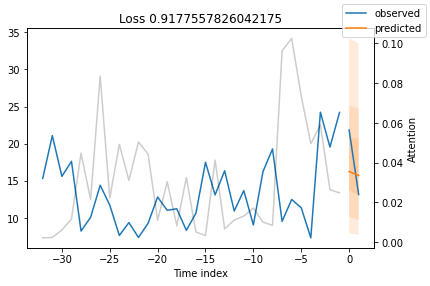

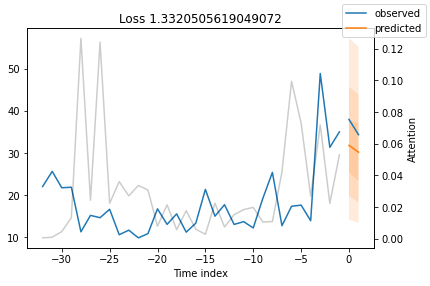

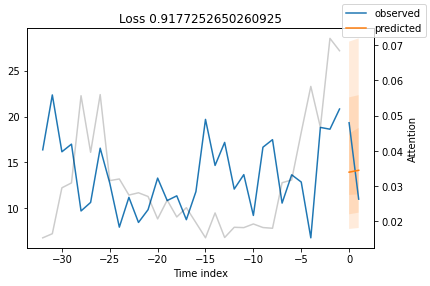

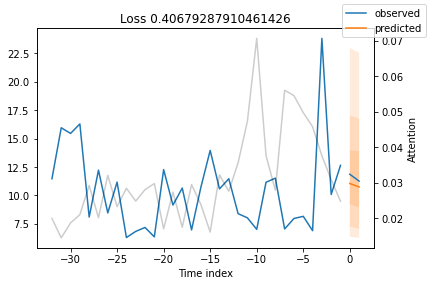

In [110]:
# raw predictions are a dictionary from which all kind of information including quantiles can be extracted
raw_predictions, x = best_tft.predict(val_dataloader, mode="raw", return_x=True)


for idx in range(4):
    best_tft.plot_prediction(x, raw_predictions, idx=idx, add_loss_to_title=True)

In [113]:
predictions_vs_actuals

{'average': {'actual': {'azoto_oraria_max': tensor([ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
            0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
            0.0000,  0.0000,  0.0000, 17.5064,  0.0000,  0.0000,  0.0000,  0.0000,
            0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
            0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000, 37.9636, 34.3277,
            0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
            0.0000, 19.3330,  0.0000,  0.0000,  0.0000,  0.0000, 10.9940,  0.0000,
           11.8610, 11.2592, 25.7831,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
            0.0000,  0.0000, 19.8660,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
            0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
            0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
            0.0000,  0.0000,  0.0000,  0.0000,

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 12 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


{'azoto_oraria_max': <Figure size 720x360 with 2 Axes>,
 'impianti_rifiuti': <Figure size 720x360 with 2 Axes>,
 'ozono_8h_max': <Figure size 720x360 with 2 Axes>,
 'pm10_giornaliera': <Figure size 720x360 with 2 Axes>,
 'pm10_giornaliera_center': <Figure size 720x360 with 2 Axes>,
 'pm10_giornaliera_scale': <Figure size 720x360 with 2 Axes>,
 'pm2dot5_giornaliera': <Figure size 720x360 with 2 Axes>,
 'provincia': <Figure size 432x288 with 2 Axes>,
 'relative_time_idx': <Figure size 720x360 with 2 Axes>,
 'relative_time_m': <Figure size 720x360 with 2 Axes>,
 'relative_time_w': <Figure size 720x360 with 2 Axes>,
 'relative_time_y': <Figure size 720x360 with 2 Axes>,
 'siti_inquinati': <Figure size 720x360 with 2 Axes>,
 'time_idx': <Figure size 720x360 with 2 Axes>,
 'zolfo_giornaliera': <Figure size 720x360 with 2 Axes>}

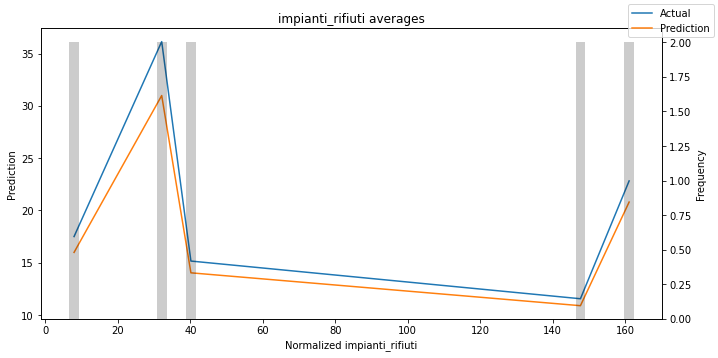

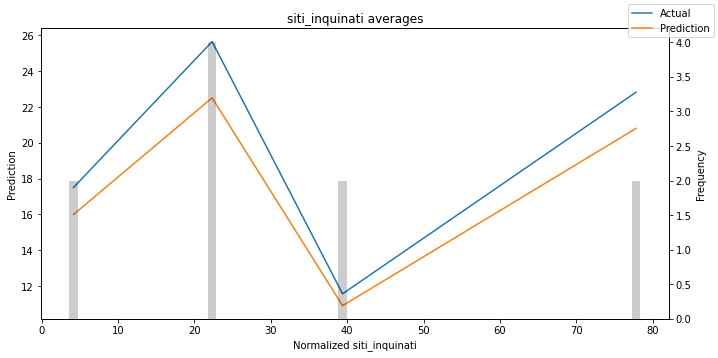

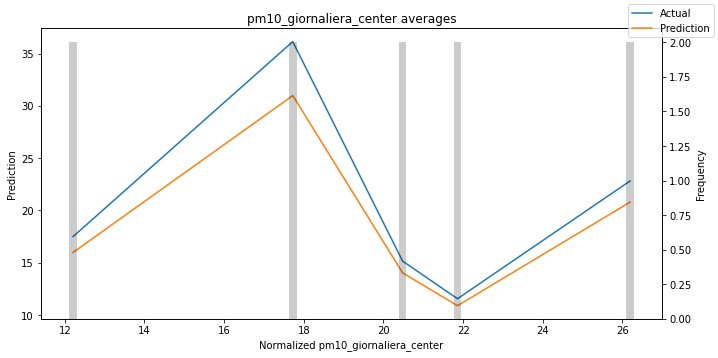

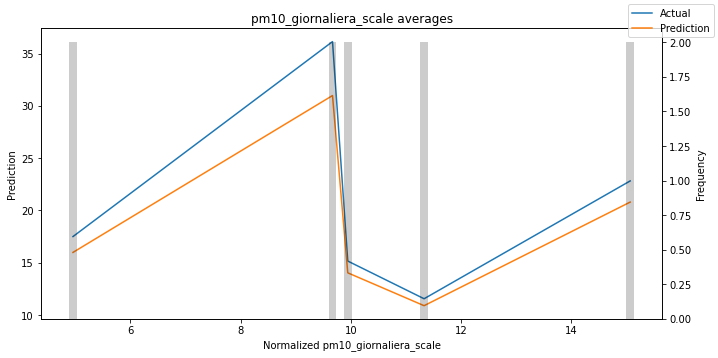

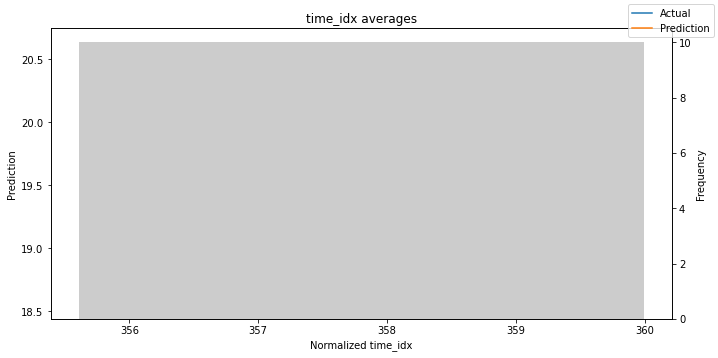

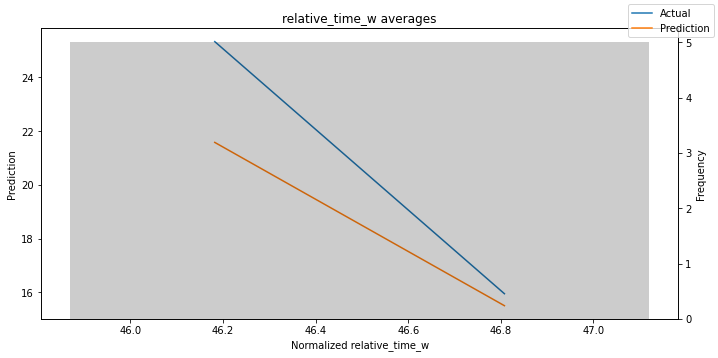

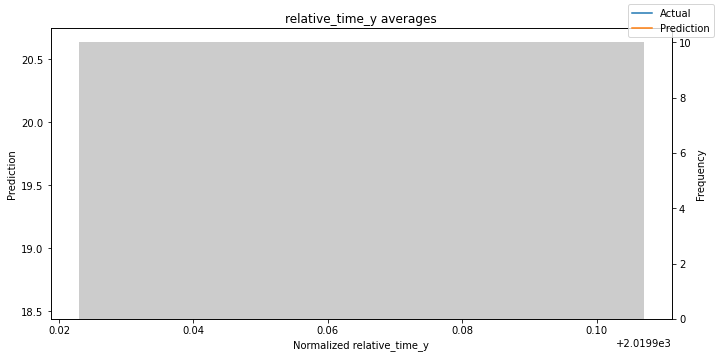

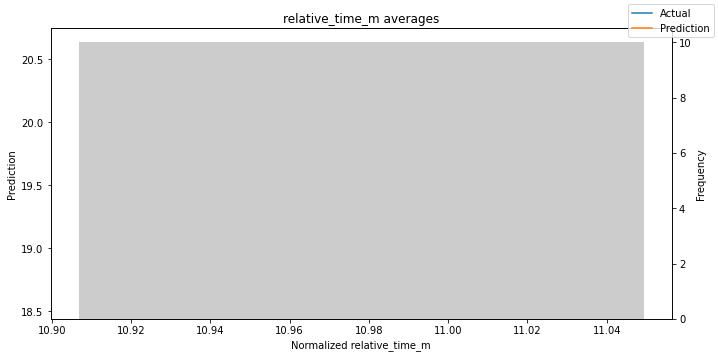

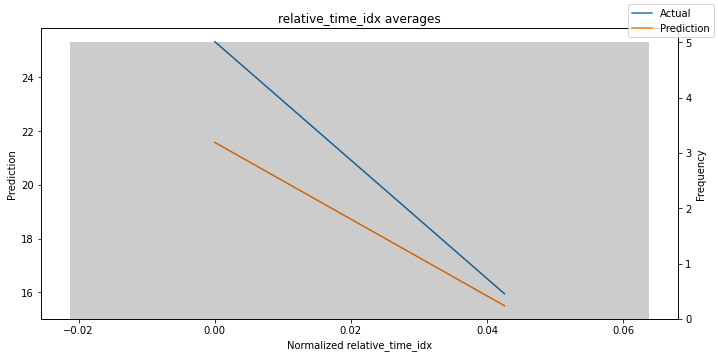

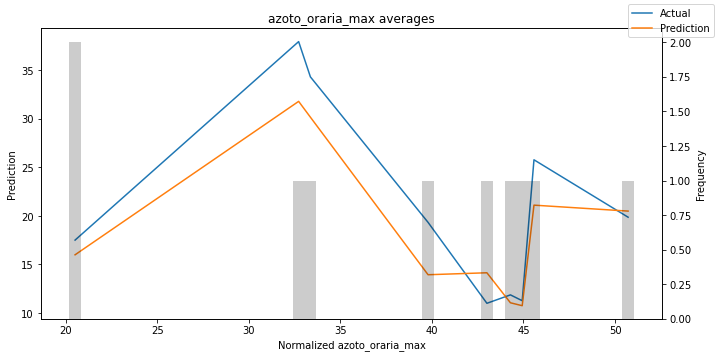

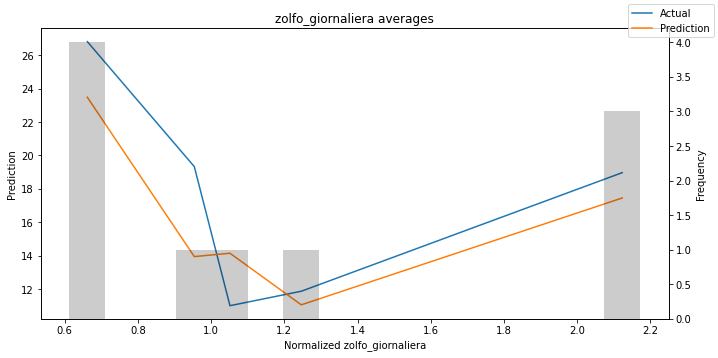

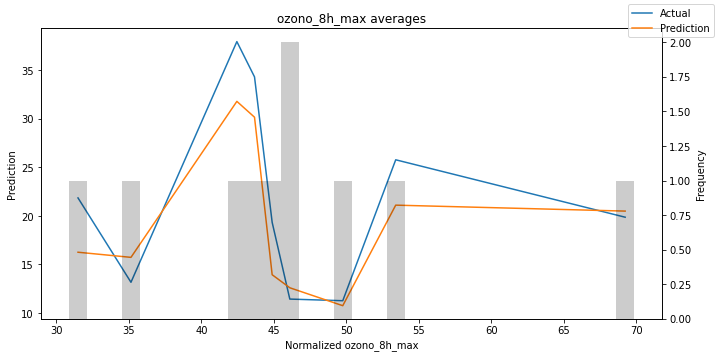

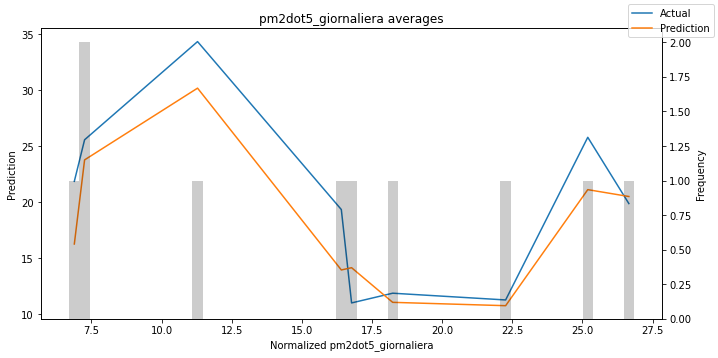

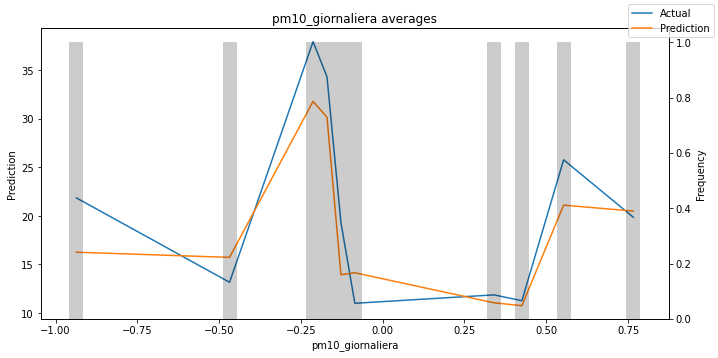

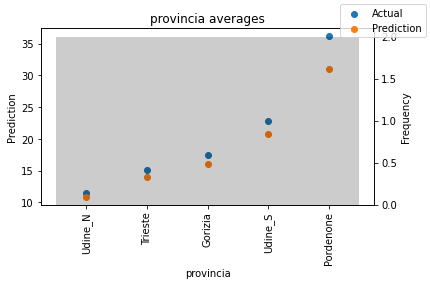

In [111]:
predictions, x = best_tft.predict(val_dataloader, return_x=True)
predictions_vs_actuals = best_tft.calculate_prediction_actual_by_variable(x, predictions)
best_tft.plot_prediction_actual_by_variable(predictions_vs_actuals)


{'azoto_oraria_max': <Figure size 720x360 with 2 Axes>,
 'impianti_rifiuti': <Figure size 720x360 with 2 Axes>,
 'ozono_8h_max': <Figure size 720x360 with 2 Axes>,
 'pm10_giornaliera': <Figure size 720x360 with 2 Axes>,
 'pm10_giornaliera_center': <Figure size 720x360 with 2 Axes>,
 'pm10_giornaliera_scale': <Figure size 720x360 with 2 Axes>,
 'pm2dot5_giornaliera': <Figure size 720x360 with 2 Axes>,
 'provincia': <Figure size 432x288 with 2 Axes>,
 'relative_time_idx': <Figure size 720x360 with 2 Axes>,
 'relative_time_m': <Figure size 720x360 with 2 Axes>,
 'relative_time_w': <Figure size 720x360 with 2 Axes>,
 'relative_time_y': <Figure size 720x360 with 2 Axes>,
 'siti_inquinati': <Figure size 720x360 with 2 Axes>,
 'time_idx': <Figure size 720x360 with 2 Axes>,
 'zolfo_giornaliera': <Figure size 720x360 with 2 Axes>}

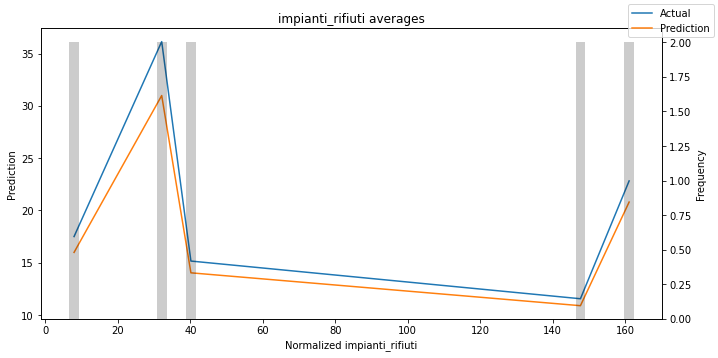

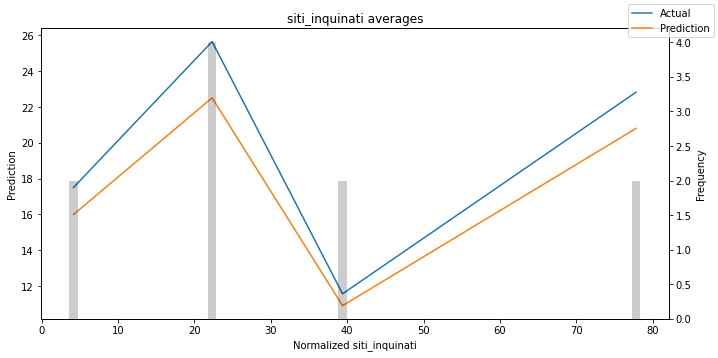

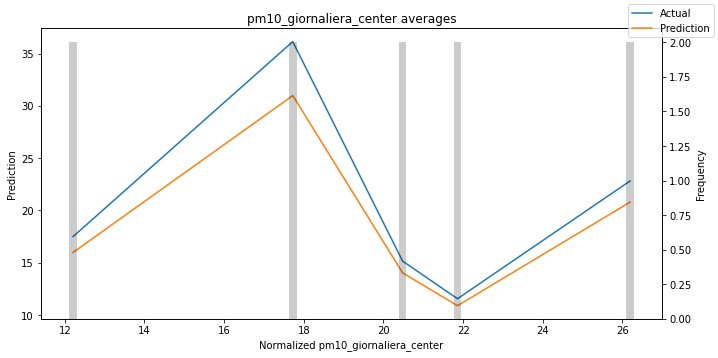

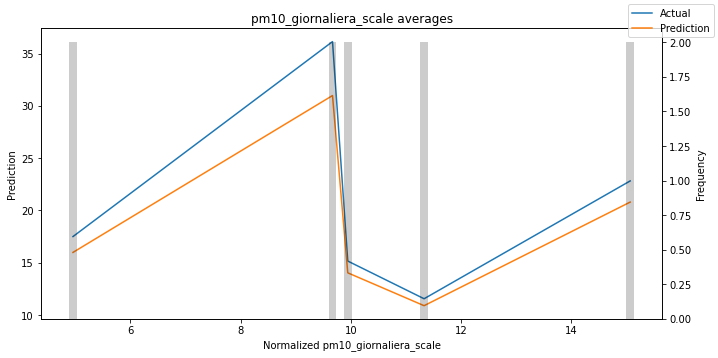

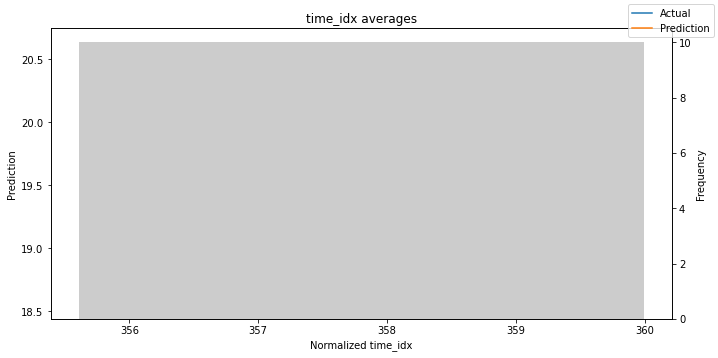

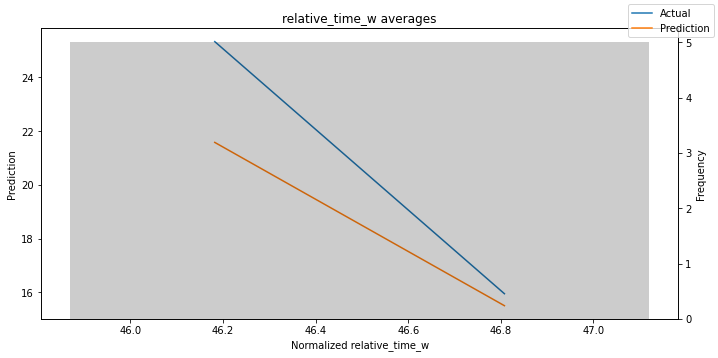

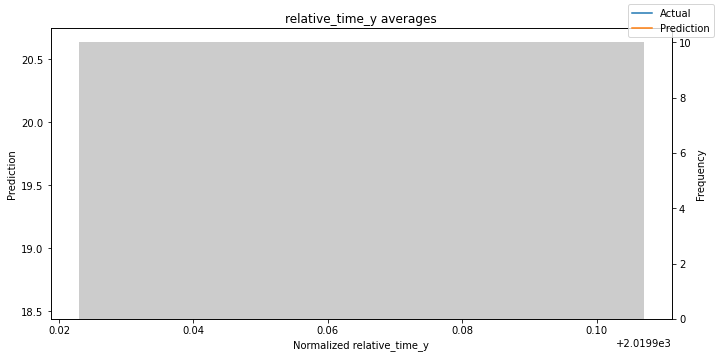

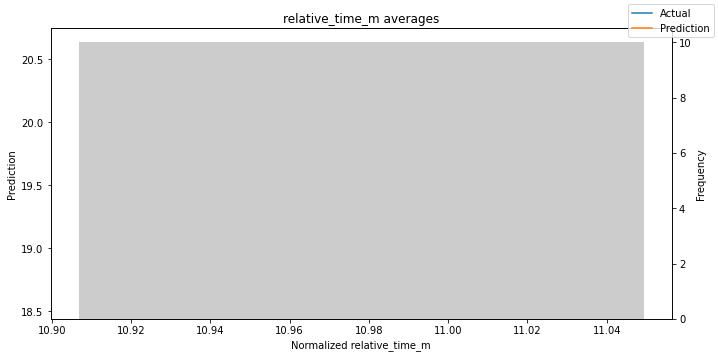

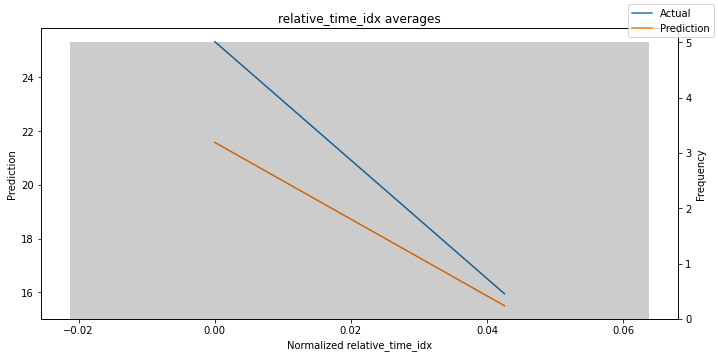

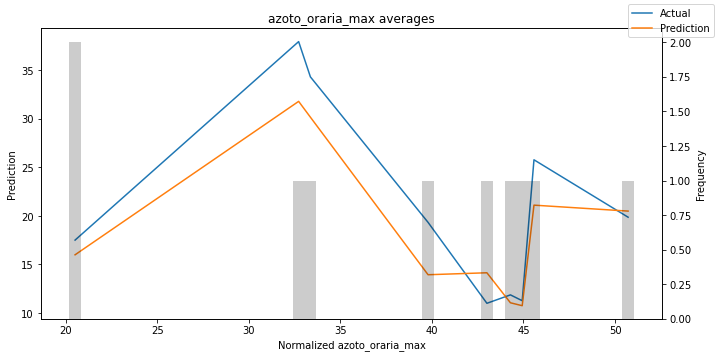

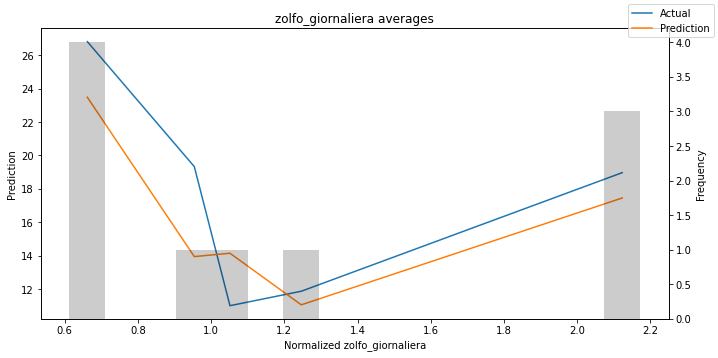

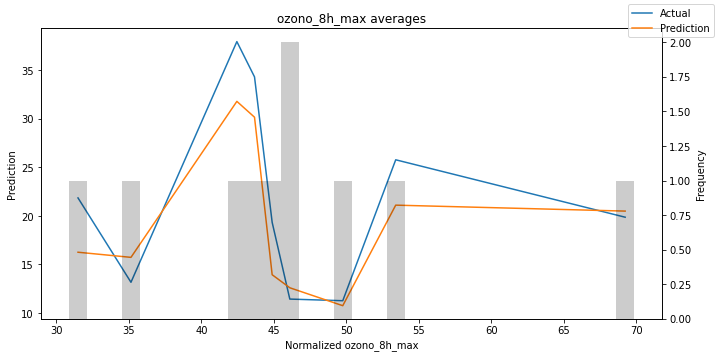

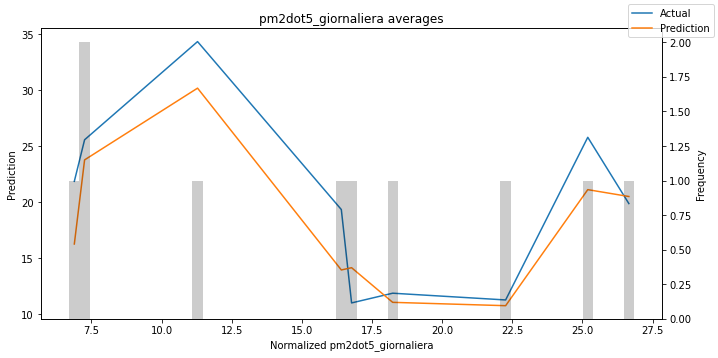

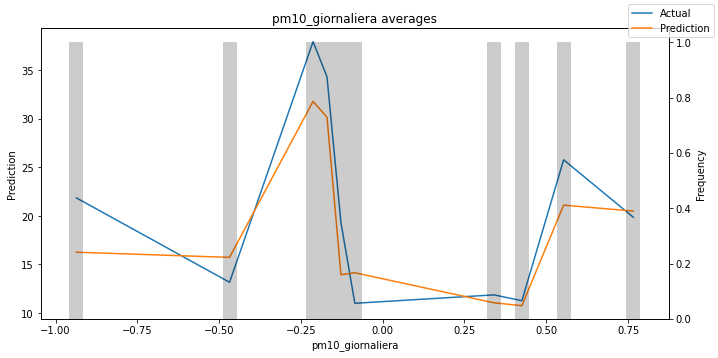

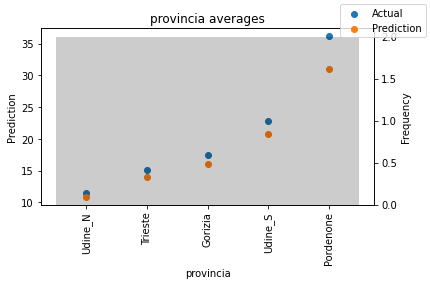

In [112]:
best_tft.plot_prediction_actual_by_variable(predictions_vs_actuals)

In [124]:
interpretation

{'attention': tensor([0.0393, 0.0363, 0.0645, 0.0908, 0.3385, 0.1318, 0.3775, 0.1242, 0.1922,
         0.1402, 0.1726, 0.1642, 0.0652, 0.1300, 0.0601, 0.1237, 0.0612, 0.0419,
         0.1389, 0.0632, 0.0890, 0.1120, 0.1428, 0.0876, 0.0758, 0.2830, 0.3474,
         0.2998, 0.2549, 0.2726, 0.2201, 0.2595]),
 'decoder_length_histogram': tensor([0, 5]),
 'decoder_variables': tensor([0.1961, 0.5856, 3.2527, 0.4705, 0.4951]),
 'encoder_length_histogram': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 5]),
 'encoder_variables': tensor([0.0445, 0.2789, 1.3526, 0.4800, 0.4016, 0.3946, 0.5158, 1.0250, 0.1716,
         0.3355]),
 'static_variables': tensor([1.2887, 1.9659, 0.3000, 1.1586, 0.2869])}

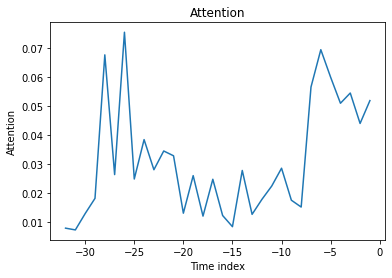

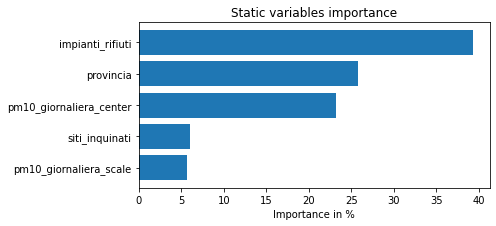

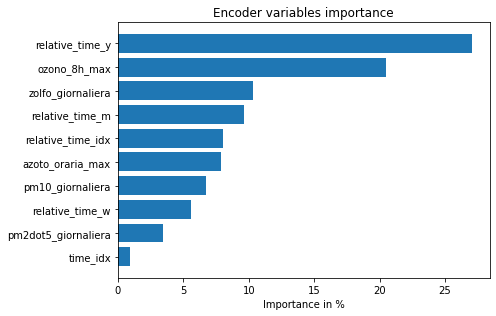

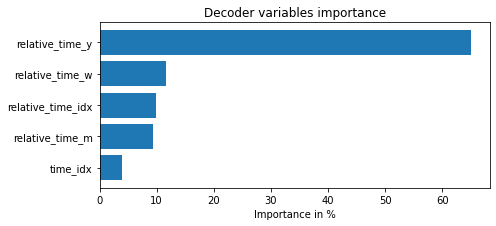

In [123]:
interpretation = best_tft.interpret_output(raw_predictions, reduction="sum")
best_tft.plot_interpretation(interpretation)
plt.savefig('test.png')

In [125]:
import plotly.graph_objects as go

In [126]:
provincia = "Trieste"

raw_prediction, xraw = best_tft.predict(
    training.filter(lambda x: (x.provincia == provincia)),
    mode="prediction",
    return_x=True,
)
baseline_predictions = Baseline().predict(training.filter(lambda x: (x.provincia == provincia)),
    mode="prediction",
    return_x=False)

predicted_df = pd.DataFrame([],columns=["time_idx","values","baseline_values"])
i=0
while i < len(raw_prediction):
    for x in range(0,len(raw_prediction[i])):
        predicted_df = predicted_df.append({"time_idx":xraw["decoder_time_idx"][i][x],"values":raw_prediction[i][x].numpy(),"baseline_values":baseline_predictions[i][x].numpy()},ignore_index=True)
    i += len(raw_prediction[i])
predicted_df["values"] = predicted_df["values"].astype(float)
predicted_df["baseline_values"] = predicted_df["baseline_values"].astype(float)
predicted_df = predicted_df.groupby(by="time_idx").mean().reset_index()
target = df_settimanale[df_settimanale["provincia"]==provincia]
fig = go.Figure()
fig.add_trace(go.Scatter(x=target["time_idx"], y=target["pm10_giornaliera"],mode='lines+markers',name="Realtà"))
fig.add_trace(go.Scatter(x=predicted_df["time_idx"], y=predicted_df["baseline_values"],mode='lines+markers',name="Baseline"))
fig.add_trace(go.Scatter(x=predicted_df["time_idx"], y=predicted_df["values"],mode='lines+markers',name="Predizione"))
fig.show()

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/utilities/parsing.py:262: UserWarning: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
  f"Attribute {k!r} is an instance of `nn.Module` and is already saved during checkpointing."
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/utilities/parsing.py:262: UserWarning: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.
  f"Attribute {k!r} is an instance of `nn.Module` and is already saved during checkpointing."


In [127]:
provincia = "Trieste"
raw_prediction, xraw = best_tft.predict(
    validation.filter(lambda x: (x.provincia == provincia)),
    mode="prediction",
    return_x=True,
)
predicted_df = pd.DataFrame([],columns=["time_idx","values"])
i=0
while i < len(raw_prediction):
    for x in range(0,len(raw_prediction[i])):
        predicted_df = predicted_df.append({"time_idx":xraw["decoder_time_idx"][i][x],"values":raw_prediction[i][x].numpy()},ignore_index=True)
    i += len(raw_prediction[i])
predicted_df["values"] = predicted_df["values"].astype(float)
target = df_settimanale[df_settimanale["provincia"]==provincia]
fig = go.Figure()
fig.add_trace(go.Scatter(x=target["time_idx"], y=target["pm10_giornaliera"],mode='lines+markers',name="Realtà"))
fig.add_trace(go.Scatter(x=predicted_df["time_idx"], y=predicted_df["values"],mode='lines+markers',name="Predizione"))
fig.show()